In [54]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from math import ceil

In [55]:
def plot_series(data, x_lab, y_lab, title, file_name, loc, scatter=False, grid=False):
  fig = matplotlib.pyplot.gcf()
  fig.set_size_inches(18.5, 8, forward=True)

  for d in data:
    if scatter:
      plt.scatter(d[0], d[1], alpha=0.8, label=d[2])
    else:
      plt.plot(d[0], d[1], alpha=0.8, label=d[2])

  plt.xlabel(x_lab)
  plt.ylabel(y_lab)
  plt.title(title)
  plt.legend(loc=loc, prop={'size': 16})
  if grid:
    # plt.grid(axis='x', color='0.95')
    # plt.grid(axis='x', which='major', color='k', linestyle='-')
    plt.grid(axis='x', which='major', color='r', linestyle='-', alpha=0.2)
    plt.grid(axis='x', which='minor', color='r', linestyle='-', alpha=0.2)
    plt.minorticks_on()

  plt.savefig(f'./visualization/el2n_craig_avg_score/{file_name}.pdf', dpi=300, transparent=True)
  plt.show()

In [64]:
tau = 0.9
runs = [0, 1, 2]
subsets = [0.3, 0.5, 0.7]
lambdas = [30, 50, 90, 200, 400, 4000]

In [65]:

max_epoch = 150

max_acc_list = []
max_lam_list = []

c10_list = []
for ss in subsets:
    max_acc = 0;
    max_lam = 0;
    for lam in lambdas:
        avg_test_acc = []
        for i, run in enumerate(runs):
            
            failed_runs = (ss==0.3 and lam==50 and run==0)
            failed_runs = failed_runs or (ss==0.3 and lam==90 and run==1)
            failed_runs = failed_runs or (ss==0.3 and lam==200 and run==1)
            failed_runs = failed_runs or (ss==0.5 and lam==200 and run==2)
            failed_runs = failed_runs or (ss==0.7 and lam==30 and run==1)
            failed_runs = failed_runs or (ss==0.7 and lam==90 and run==1)
            failed_runs = failed_runs or (ss==0.7 and lam==400 and run==0)
            failed_runs = failed_runs or (ss==0.7 and lam==4000 and run==0)
            
            if not failed_runs:
                data = np.load(f"./tmp/c10_el2n_craig_wt/c10_el2n_craig_wt-{run}-{ss}-{lam}.npz")
                avg_test_acc.append(data['test_acc'][0][:max_epoch])
        avg_test_acc = np.array(avg_test_acc)
        avg_test_acc = avg_test_acc.mean(axis=0)
        c10_list.append({
            'subset': ss,
            'lam': lam,
            'test_acc':avg_test_acc
        })
        
        if avg_test_acc.max() > max_acc:
            max_acc = avg_test_acc.max()
            max_lam = lam
    max_acc_list.append({
        'subset': ss,
        'max_acc': max_acc,
        'lambda': max_lam
    })

max_acc_list
    

[{'subset': 0.3, 'max_acc': 88.525, 'lambda': 90},
 {'subset': 0.5, 'max_acc': 89.61, 'lambda': 200},
 {'subset': 0.7, 'max_acc': 91.455, 'lambda': 400}]

### Average EL2N

In [58]:
# load average runs:

runs = [0, 1, 2]
taus = [0.1, 0.3, 0.5, 0.7, 0.9]
# subsets = [0.3,0.5, 0.7, 0.9]
subsets = [0.3,0.5, 0.7, 0.9]
c10_avg_list = []

max_acc = 0
max_tau = 0

for ss in subsets:
    for tau in taus:
        avg_test_acc = []
        for i, run in enumerate(runs):
            data = np.load(f"./tmp/c10_el2n_wt_avg/c10_el2n_wt_avg-{run}-{ss}-{tau}_b128_{run}_tau{tau}.npz")
            avg_test_acc.append(data['test_acc'][0])
        avg_test_acc = np.array(avg_test_acc)
        avg_test_acc = avg_test_acc.mean(axis=0)
        c10_avg_list.append({
            'subset': ss,
            'tau': tau,
            'test_acc':avg_test_acc
        })
        
        if data['test_acc'][0].max() > max_acc:
            max_acc = data['test_acc'][0].max()
            max_tau = tau

### Craig Baseline

In [59]:
runs = [0, 1, 2]
subsets = [0.3, 0.5, 0.7, 0.9, 1]
c10_craig_list = []

for ss in subsets:
    avg_test_acc = []
    for i, run in enumerate(runs):
        if ss == 0.5 and run == 2 or ss == 0.7 and run == 0:
            continue
            "c10_craig_baseline-0-0.1-0_b128_0_grd_w_warm_mile_start_0_lag_1_b256_0_False_rp0_el0"
        data = np.load(f"./tmp/c10_craig_baseline/c10_craig_baseline-{run}-{ss}-0_b128_{run}_grd_w_warm_mile_start_0_lag_1_b256_{run}_False_rp0_el0.npz")
        avg_test_acc.append(data['test_acc'][0])
    avg_test_acc = np.array(avg_test_acc)
    avg_test_acc = avg_test_acc.mean(axis=0)
    c10_craig_list.append({
        'subset': ss,
        'tau': tau,
        'test_acc':avg_test_acc
    })

    print(f"Subset: {ss}, Max Acc: {avg_test_acc.max()}")
        
max_epoch = 150

# Test Accuracy
# series_list = [
# ]

# for x in c10_craig_list:
#     batch_per_epoch = ceil(50000 * x['subset'] / 128)
#     epoch = [x * batch_per_epoch for x in range(max_epoch)]
#     series_list.append((epoch, x['test_acc'][:max_epoch], f"{int(x['subset']*100)}% subset"))

# plot_series(data=series_list, x_lab="Gradient Updates", y_lab="Test Accuracy",
#             title="Test Accuracy Cifar 10", file_name=f"test_acc_vanila", 
#             loc="lower right")

Subset: 0.3, Max Acc: 85.89333333333333
Subset: 0.5, Max Acc: 89.99000000000001
Subset: 0.7, Max Acc: 90.875
Subset: 0.9, Max Acc: 91.89
Subset: 1, Max Acc: 92.30666666666667


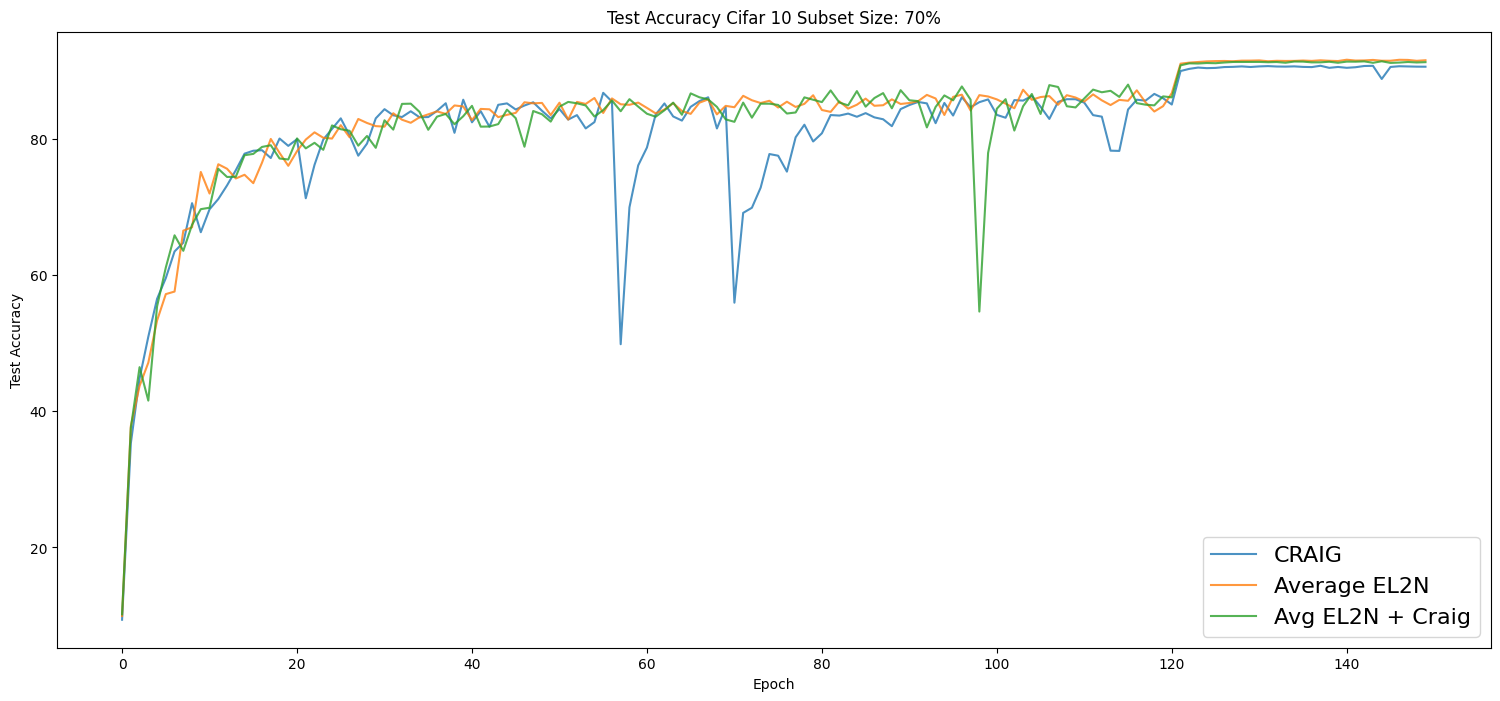

In [66]:
ss = 0.7
lam = 400
max_epoch = 150
tau = 0.9

craig_acc = None
for x in c10_craig_list:
    if x["subset"] == ss:
        craig_acc = x["test_acc"]
        
el2n_avg_acc = None
for x in c10_avg_list:
    if x["subset"] == ss and x["tau"] == tau:
        el2n_avg_acc = x["test_acc"]
        
el2n_craig_avg_acc = None
for x in c10_list:
    if x["subset"] == ss and x["lam"] == lam:
        el2n_craig_avg_acc = x["test_acc"]

epoch = [x for x in range(max_epoch)]

series_list = [
    (epoch, craig_acc[:max_epoch], f"CRAIG"),
    (epoch, el2n_avg_acc[:max_epoch], f"Average EL2N"),
    (epoch, el2n_craig_avg_acc[:max_epoch], f"Avg EL2N + Craig"),
]


plot_series(data=series_list, x_lab="Epoch", y_lab="Test Accuracy",
            title=f"Test Accuracy Cifar 10 Subset Size: {int(ss*100)}%", file_name=f"craig_vs_el2n_vs_combination_ss{ss}", 
            loc="lower right")

In [53]:
lambdas = [30, 50, 90, 200, 400, 4000]
def wt(l):
    return np.exp(-100/l)

[wt(x) for x in lambdas]

[0.035673993347252395,
 0.1353352832366127,
 0.32919298780790557,
 0.6065306597126334,
 0.7788007830714049,
 0.9753099120283326]